# **Loading Neccessary Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import ADASYN

# **Data Loading:**

In [ ]:
# Loading and Reading the Dataset into Colab
df = pd.read_csv('/content/Banking_Churn_Dataset.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Exploratory Data Analysis (EDA):**

In [ ]:
# Check dimension of dataset
print('The dimension of dataset is (row, column):')
df.shape

The dimension of dataset is (row, column):


(10000, 14)

In [ ]:
# Check datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Check for any missing values
print('Missing Values:')
df.isnull().sum()

Missing Values:


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Univaraite Analysis:

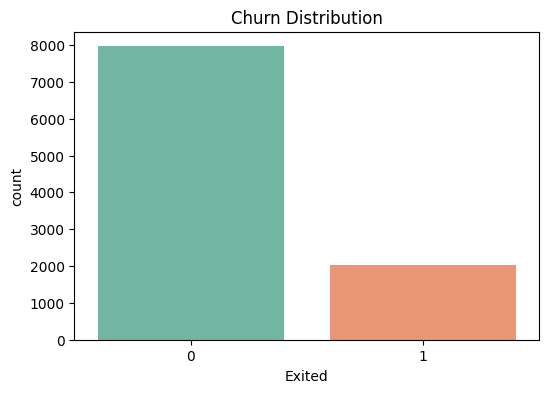

In [ ]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Exited', legend=False, palette='Set2')
plt.title('Churn Distribution')
plt.show()

*   There are significantly more customers who did not churn (label 0) compared to those who churned (label 1).
*   This suggests a strong class imbalance, which is common in churn prediction problems.
*   Need to handle this imbalance using techniques like SMOTE, ADASYN.
*   The high number of non-churning customers is a good sign for the business initially, as it indicates that a majority of customers are retained.
*   However, understanding the characteristics of the churned customers is crucial for devising strategies to reduce churn.


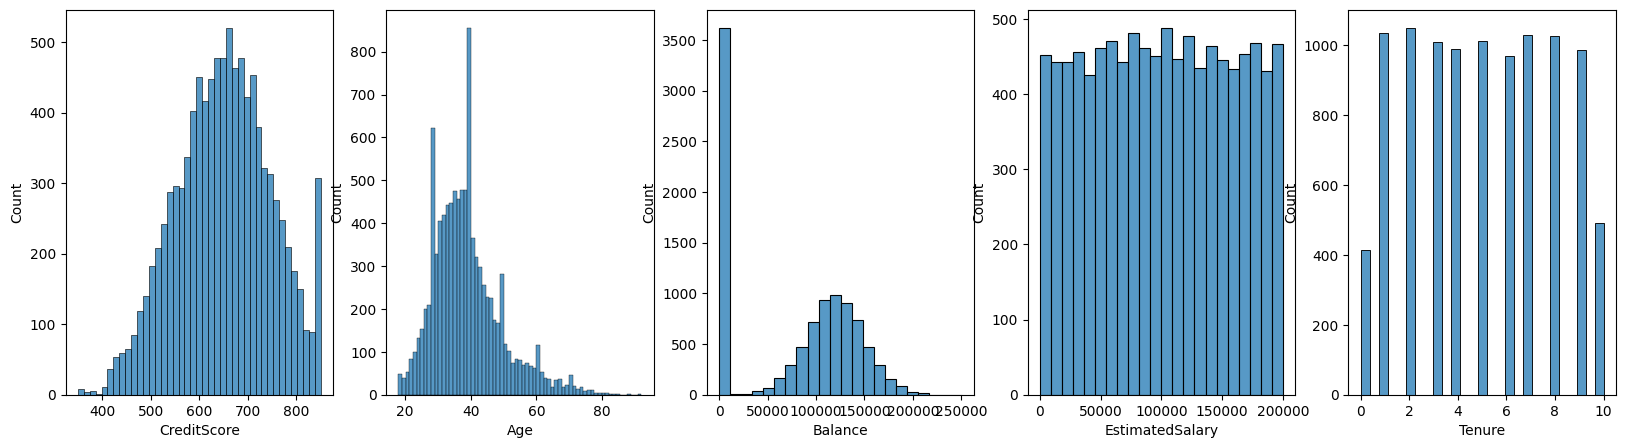

In [ ]:
# Histograms for numeric features
numeric_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
fig, ax = plt.subplots(1,len(numeric_features),figsize=(20,5))
for i, feature in enumerate(numeric_features):
  sns.histplot(data=df, x=feature, ax=ax[i])

1. CreditScore Distribution:
    *   The distribution of CreditScore is approximately normal, centered around 650-700.
    *   Most customers have a credit score between 600 and 800.
    *   Very few customers have extremely low or extremely high credit scores (below 400 or above 850).
    *   Insight: Since a good credit score is generally associated with lower financial risk, we can explore whether lower credit scores correlate with higher churn rates.

2. Age Distribution:
    *   The Age feature shows a skewed distribution, with a noticeable spike in the 35-40 age range.
    *   There are fewer customers in the younger (below 20) and older age groups (above 60).
    *   Insight: The spike suggests that the bank’s customer base is concentrated among middle-aged individuals. Analyzing churn rates across different age groups could reveal whether younger or older customers are more likely to churn.

3. Balance Distribution:
    *   The Balance feature has a bimodal distribution, with a significant spike at 0 and another peak around the 100,000-150,000 range.
    *   A large portion of customers have a balance of 0.
    *   Insight: Customers with a 0 balance might represent those who don’t actively use their bank accounts or have minimal engagement. This group could be more prone to churn. Further analysis is needed to understand the relationship between balance and churn.

4. EstimatedSalary Distribution:
    *   The distribution of EstimatedSalary is relatively uniform, indicating that customers’ salaries are spread across a wide range.
    *   There are no clear peaks or concentrations, suggesting the dataset covers a diverse range of income levels.
    *   Insight: Since salary distribution is uniform, it may not be a strong predictor of churn on its own. However, combined with other features like Age or Balance, it might provide better insights.

5. Tenure Distribution:
    *   The Tenure feature, which indicates the number of years a customer has been with the bank, appears to have a roughly uniform distribution across most values, except for a spike at 0 and a drop at 10 years.
    *   Insight: The spike at 0 suggests many customers are new or have recently joined the bank, which could be a risk factor for churn. The drop at 10 might indicate that fewer customers reach a long-term tenure.


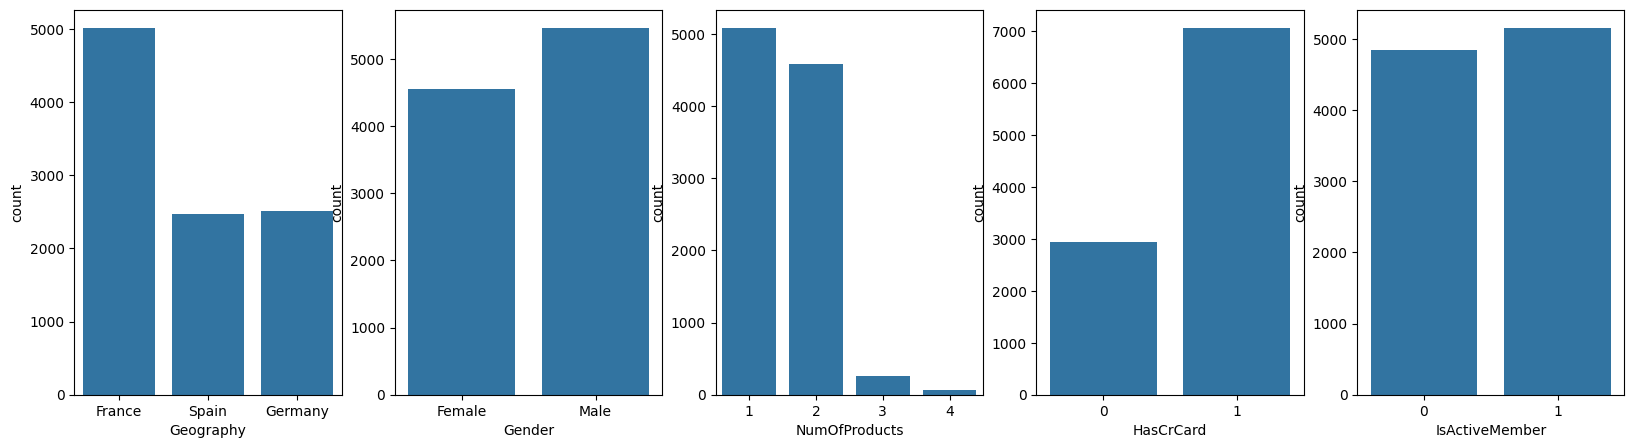

In [ ]:
# Bar plots for categorical features
categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
fig, ax = plt.subplots(1,len(numeric_features),figsize=(20,5))
for i, feature in enumerate(categorical_features):
  sns.countplot(data=df, x=feature, ax=ax[i])

1. Geography Distribution:
    *   The majority of customers are from France, followed by Spain and Germany.
    *   Insight: The imbalance in customer distribution across different geographies might affect churn analysis. It is important to consider whether churn rates differ significantly between countries, as this could indicate differences in customer preferences or service quality.

2. Gender Distribution:
    *   The number of male and female customers is almost balanced, with a slightly higher count of male customers.
    *   Insight: Since gender is balanced, it can help ensure that gender-based analysis isn’t biased by an uneven sample size. However, we should check if one gender has a higher churn rate, which could provide insights for targeted retention strategies.

3. Number of Products (NumOfProducts) Distribution:
    *   Most customers have 1 or 2 products. Very few customers have 3 or 4 products.
    *   Insight: The distribution suggests that customers typically use only a small number of products. Customers with more products might be more engaged and less likely to churn. Further analysis can reveal if having more products is associated with lower churn rates.

4. Credit Card Ownership (HasCrCard) Distribution:
    *   The majority of customers have a credit card (HasCrCard = 1).
    *   Insight: Credit card ownership could be a sign of customer engagement. It would be useful to examine if customers without credit cards are more likely to churn, as they might have a lower level of banking services engagement.

5. Active Member Status (IsActiveMember) Distribution:
    *   The number of active and inactive members is roughly balanced.
    *   Insight: Active membership could be a strong predictor of churn. Inactive members might be more likely to leave the bank, so further analysis is needed to understand this relationship.

## Bivariate Analysis:

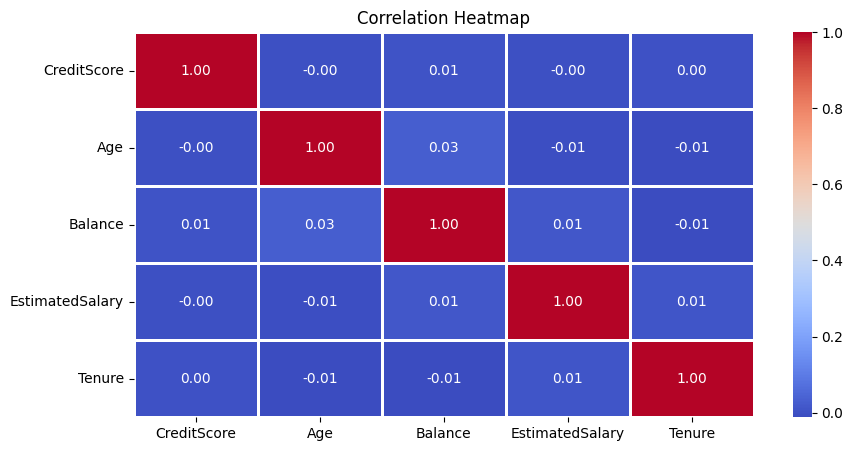

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

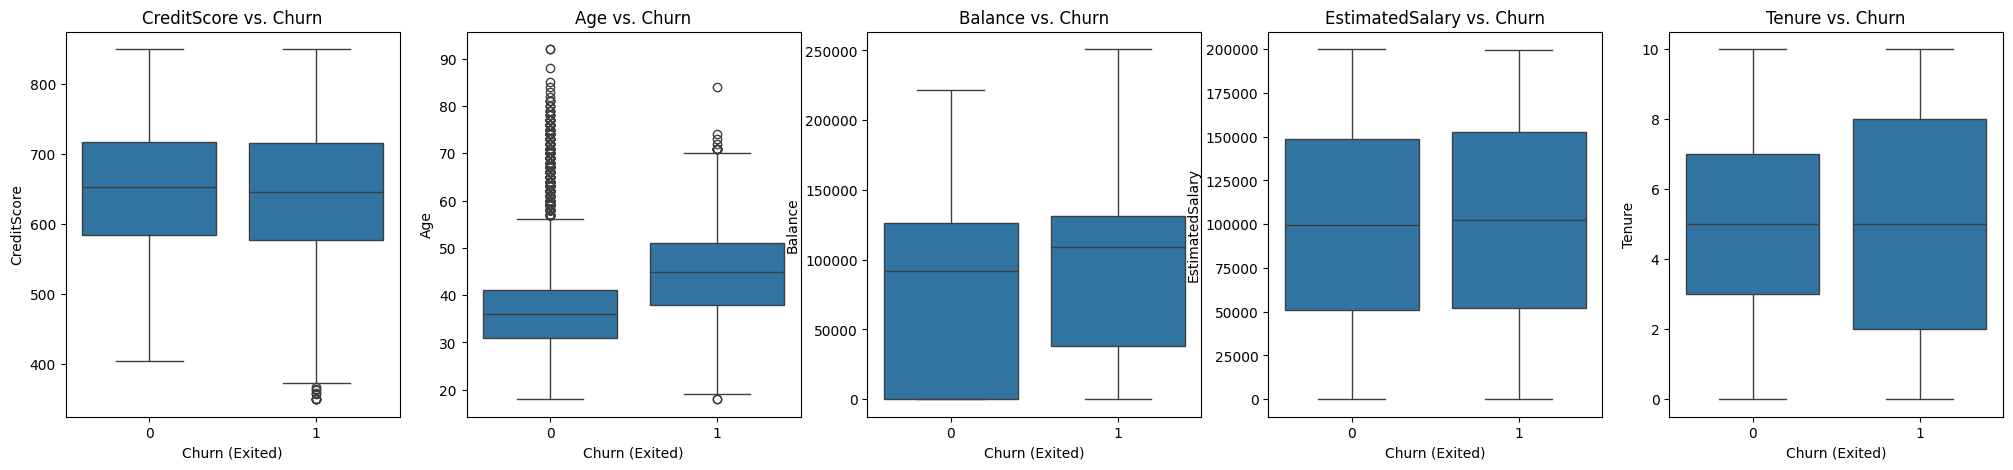

In [ ]:
# Boxplot of numeric features vs. Churn
fig, ax = plt.subplots(1,len(numeric_features),figsize=(25,5))
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, x='Exited', y=feature, ax=ax[i])
    ax[i].set_title(f'{feature} vs. Churn')
    ax[i].set_xlabel('Churn (Exited)')
    ax[i].set_ylabel(feature)

**Overall Insights:**
*   Age and Balance appear to be more meaningful predictors of churn compared to other numeric features.
*   CreditScore, EstimatedSalary, and Tenure do not show significant differences between churned and non-churned customers, suggesting they may have limited predictive power on their own.
*   The findings suggest focusing on age-based and balance-related strategies for churn prevention. For example, older customers with higher balances might require more personalized engagement to retain.


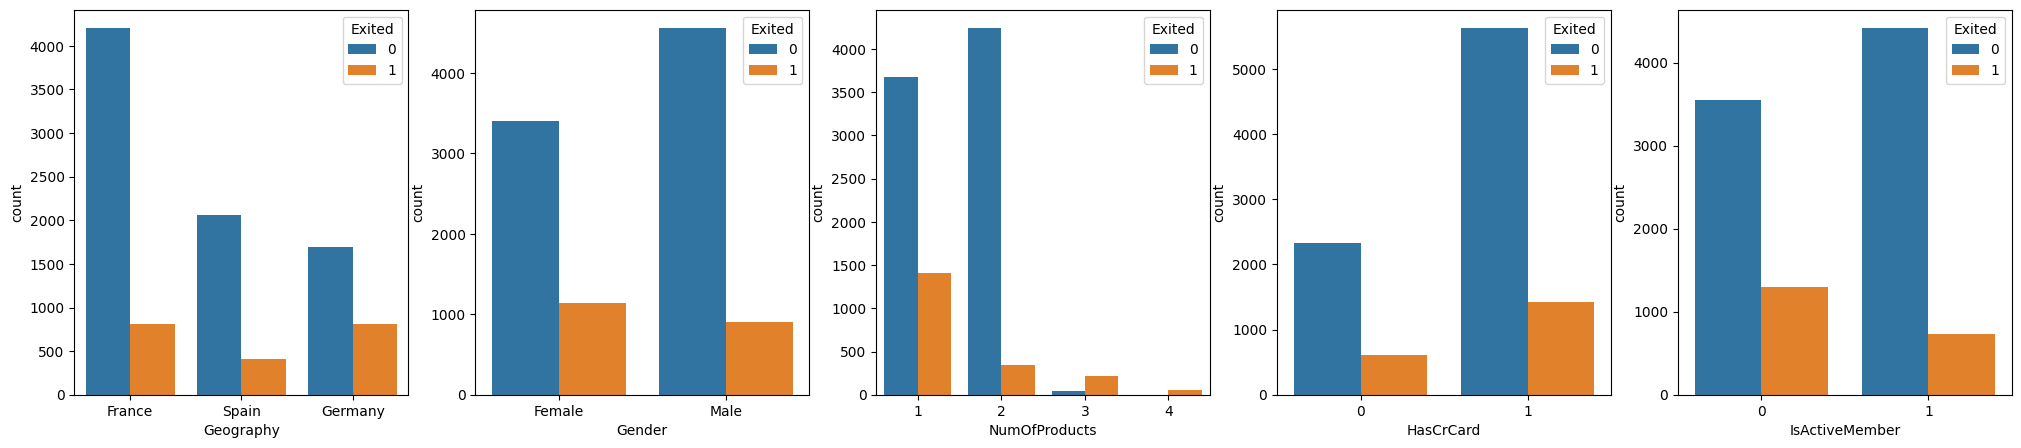

In [ ]:
# Churn rate by categorical features
fig, ax = plt.subplots(1,len(categorical_features),figsize=(25,5))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='Exited', ax=ax[i])
    ax[i].set_xlabel(feature)

**Overall Insights:**
*   Geography, Gender, and Active Member Status are strong predictors of churn.
*   Customers with only one product or who are not actively engaged with the bank (inactive members) have a higher likelihood of churning.
*   Gender-specific and region-specific retention strategies could be effective in reducing churn rates.
*   Increasing engagement through cross-selling additional products, especially to customers with only one product, might reduce churn.

## Multivariate Analysis:

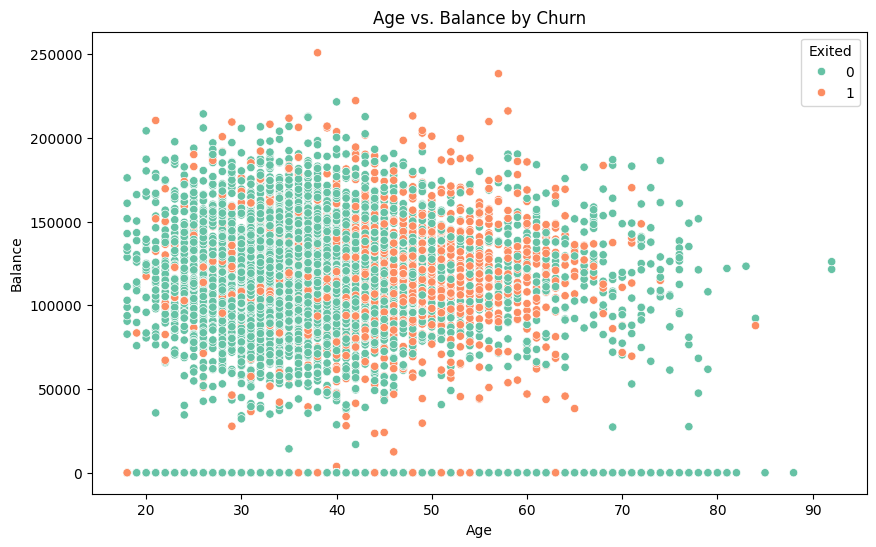

In [ ]:
# Scatter plot of Age vs. Balance colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', palette='Set2')
plt.title('Age vs. Balance by Churn')
plt.show()

*   Older customers with high balances: There are clusters of orange dots (churned customers) among older age groups who also have higher balances. This suggests that older customers with substantial balances are more prone to churn.
*   Younger customers with varying balances: Younger customers, regardless of their balance, generally show lower churn rates.

# **Data Preprocessing:**

## Remove Irrelevant Columns:

In [ ]:
# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

## Remove outliers from Numeric Features:

In [ ]:
# Remove outliers using Box-plot Technique
# CreditScore and Age have outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df = df[(df['CreditScore'] >= lower_bound) & (df['CreditScore'] <= upper_bound)]

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

## Encode Categorical Variables:

In [ ]:
#Binary encoding for Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# One-hot encoding for Geography
df = pd.get_dummies(df, columns = ['Geography'], dtype = float)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


## Declare Inputs and Target:

In [ ]:
# Separate inputs and target variable
X = df.drop(columns=['Exited'])
y = df['Exited']

## Feature Scaling:

In [ ]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform
X_scaled = scaler.fit_transform(X)

## Train-Test Split:

In [ ]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Handling Class Imbalance:

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:", y_train_smote.value_counts())

Class distribution after SMOTE: Exited
0    6141
1    6141
Name: count, dtype: int64


# **Construct Baseline Model (Logistic Regression):**

In [ ]:
# Initialize the Logistic Regression model
log_model = LogisticRegression(random_state=42)

# Train the model on the training data
log_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy:.2f}\n')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
print('Confusion Matrix:')
print(conf_matrix, '\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_log))

Accuracy: 0.73

Confusion Matrix:
[[1135  401]
 [ 114  276]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1536
           1       0.41      0.71      0.52       390

    accuracy                           0.73      1926
   macro avg       0.66      0.72      0.67      1926
weighted avg       0.81      0.73      0.75      1926



# **Constuct K-Nearest Neighbour (KNN) Model:**

In [ ]:
# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.2f}\n')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(conf_matrix, '\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.74

Confusion Matrix:
[[1164  372]
 [ 127  263]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1536
           1       0.41      0.67      0.51       390

    accuracy                           0.74      1926
   macro avg       0.66      0.72      0.67      1926
weighted avg       0.80      0.74      0.76      1926



# **Contruct Random Forest Model:**

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}\n')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix, '\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.85

Confusion Matrix:
[[1393  143]
 [ 146  244]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1536
           1       0.63      0.63      0.63       390

    accuracy                           0.85      1926
   macro avg       0.77      0.77      0.77      1926
weighted avg       0.85      0.85      0.85      1926



# **Advanced Class Imbalance Handling Technique (ADASYN):**

In [ ]:
# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Apply ADASYN to the training set
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:", y_train_adasyn.value_counts())

Class distribution after ADASYN: Exited
1    6247
0    6141
Name: count, dtype: int64


## Logistic Regression Model using ADASYN:

In [ ]:
# Initialize the Logistic Regression model
log_model = LogisticRegression(random_state=42)

# Train the model on the training data
log_model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on the test set
y_pred_log2 = log_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log2)
print(f'Accuracy: {accuracy:.2f}\n')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log2)
print('Confusion Matrix:')
print(conf_matrix, '\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_log2))

Accuracy: 0.70

Confusion Matrix:
[[1073  463]
 [ 109  281]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1536
           1       0.38      0.72      0.50       390

    accuracy                           0.70      1926
   macro avg       0.64      0.71      0.64      1926
weighted avg       0.80      0.70      0.73      1926



## Random Forest Model using ADASYN:

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on the test set
y_pred_rf2 = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf2)
print(f'Accuracy: {accuracy:.2f}\n')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf2)
print('Confusion Matrix:')
print(conf_matrix, '\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_rf2))

Accuracy: 0.84

Confusion Matrix:
[[1371  165]
 [ 137  253]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1536
           1       0.61      0.65      0.63       390

    accuracy                           0.84      1926
   macro avg       0.76      0.77      0.76      1926
weighted avg       0.85      0.84      0.85      1926



## K-Nearest Neighbours (KNN) Model using ADASYN:

In [ ]:
# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_adasyn, y_train_adasyn)

# Predict on the test set
y_pred_knn2 = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn2)
print(f'Accuracy: {accuracy:.2f}\n')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn2)
print('Confusion Matrix:')
print(conf_matrix, '\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_knn2))

Accuracy: 0.72

Confusion Matrix:
[[1114  422]
 [ 124  266]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1536
           1       0.39      0.68      0.49       390

    accuracy                           0.72      1926
   macro avg       0.64      0.70      0.65      1926
weighted avg       0.80      0.72      0.74      1926



## Comparison of SMOTE and ADASYN:

In [ ]:
# Generate classification report as a dictionary for SMOTE
report_smote_lr = classification_report(y_test, y_pred_log, output_dict=True)
report_smote_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_smote_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Generate classification report as a dictionary for ADASYN
report_adasyn_lr = classification_report(y_test, y_pred_log2, output_dict=True)
report_adasyn_rf = classification_report(y_test, y_pred_rf2, output_dict=True)
report_adasyn_knn = classification_report(y_test, y_pred_knn2, output_dict=True)

In [ ]:
# Function to extract specific metrics from the report
def extract_metrics(report):
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1_score = report["1"]["f1-score"]
    accuracy = report["accuracy"]
    return accuracy, precision, recall

# SMOTE Metrics
smote_lr_metrics = extract_metrics(report_smote_lr)
smote_rf_metrics = extract_metrics(report_smote_rf)
smote_knn_metrics = extract_metrics(report_smote_knn)

# ADASYN Metrics
adasyn_lr_metrics = extract_metrics(report_adasyn_lr)
adasyn_rf_metrics = extract_metrics(report_adasyn_rf)
adasyn_knn_metrics = extract_metrics(report_adasyn_knn)

In [ ]:
# Create the DataFrame for comparison
metrics_table = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN'],
    'SMOTE Accuracy': [smote_lr_metrics[0], smote_rf_metrics[0], smote_knn_metrics[0]],
    'SMOTE Precision': [smote_lr_metrics[1], smote_rf_metrics[1], smote_knn_metrics[1]],
    'SMOTE Recall': [smote_lr_metrics[2], smote_rf_metrics[2], smote_knn_metrics[2]],
    'ADASYN Accuracy': [adasyn_lr_metrics[0], adasyn_rf_metrics[0], adasyn_knn_metrics[0]],
    'ADASYN Precision': [adasyn_lr_metrics[1], adasyn_rf_metrics[1], adasyn_knn_metrics[1]],
    'ADASYN Recall': [adasyn_lr_metrics[2], adasyn_rf_metrics[2], adasyn_knn_metrics[2]]
}

performance_df = pd.DataFrame(metrics_table)

# Display the DataFrame
performance_df

,Model,SMOTE Accuracy,SMOTE Precision,SMOTE Recall,ADASYN Accuracy,ADASYN Precision,ADASYN Recall
0,Logistic Regression,0.732606,0.407681,0.707692,0.703011,0.377688,0.720513
1,Random Forest,0.849948,0.630491,0.625641,0.843198,0.605263,0.648718
2,KNN,0.740914,0.414173,0.674359,0.716511,0.386628,0.682051




*   Comparing SMOTE metrics and ADASYN metrics for each model. We can see that Class Imbalancing Handling Technique of SMOTE performed better than ADASYN.



# **Hyperparameter Tuning:**

## Logistic Regression:

In [ ]:
# Parameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l2'],  # 'l1' requires solvers like 'liblinear' or 'saga'
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 500, 1000]
}

# GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train_smote, y_train_smote)

# Best parameters and model
best_params_lr = grid_search_lr.best_params_
best_lr_model = grid_search_lr.best_estimator_
print("Best Parameters for Logistic Regression:", best_params_lr)

# Evaluate the optimized Logistic Regression model
y_pred_lr = best_lr_model.predict(X_test)
print("\nLogistic Regression Evaluation Metrics:")
print(classification_report(y_test, y_pred_lr))

Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Logistic Regression Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1536
           1       0.41      0.71      0.52       390

    accuracy                           0.73      1926
   macro avg       0.66      0.72      0.67      1926
weighted avg       0.81      0.73      0.75      1926





*   Results for Logistic Regression Model stay the same even with using the GridSearch to find the best parameters.



## K-Nearest Neighbour (KNN):

In [ ]:
# Parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(X_train_smote, y_train_smote)

# Best parameters and model
best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_
print("Best Parameters for KNN:", best_params_knn)

# Evaluate the optimized KNN model
y_pred_knn = best_knn_model.predict(X_test)
print("\nKNN Evaluation Metrics:")
print(classification_report(y_test, y_pred_knn))

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

KNN Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1536
           1       0.47      0.64      0.54       390

    accuracy                           0.78      1926
   macro avg       0.69      0.73      0.70      1926
weighted avg       0.81      0.78      0.79      1926





*   Tuned KNN shows better accuracy and precision for class 1. But recall for class 0 and class 1 increases and decreases respectively. According to f1-score, the tuned KNN model is better.


## Random Forest:

In [ ]:
# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [200, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)

# Best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", best_params_rf)

# Evaluate the optimized Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
print("\nRandom Forest Evaluation Metrics:")
print(classification_report(y_test, y_pred_rf))

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1536
           1       0.65      0.59      0.62       390

    accuracy                           0.85      1926
   macro avg       0.77      0.75      0.76      1926
weighted avg       0.85      0.85      0.85      1926





*   Accuracy of both Tuned Random Forest model and normal is same. Precision for class 1 increases in the Tuned model but everything else decreases slightly.
*   Therefore, untuned Random Forest Model performed better.



# **Customer Segmentation:**

Segmenting customers allows us to group them based on similar characteristics, which can help improve model accuracy and interpretability. For example, older customers with high balances may behave differently than younger customers with low balances, so treating them separately may yield better predictions.

## Prepare the Data for Clustering:

In [ ]:
# Select features for clustering
clustering_features = ['Age', 'Balance']

# Extract data for clustering
X_clustering = df[clustering_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

## Determine the Optimal Number of Clusters:

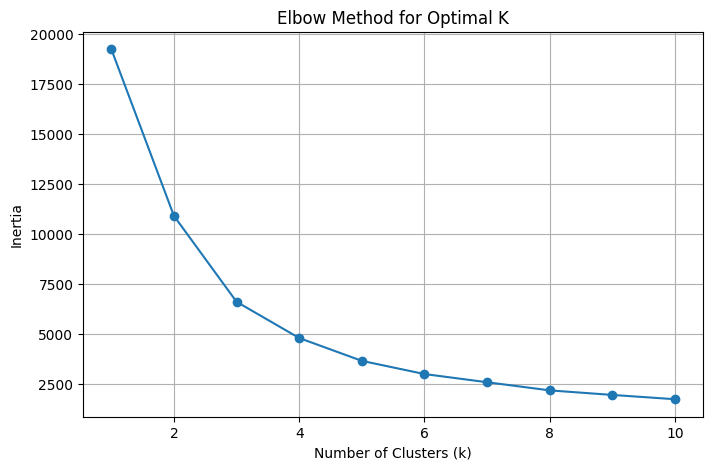

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Apply K-means Clustering:

In [ ]:
# Fit the K-means model with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Analyze each cluster
cluster_summary = df.groupby('Segment')[clustering_features].mean()
print(cluster_summary)

               Age        Balance
Segment                          
0        33.584391  123132.189598
1        50.061358   96882.353981
2        35.202657    1909.738672


## Visualize the Created Segments:

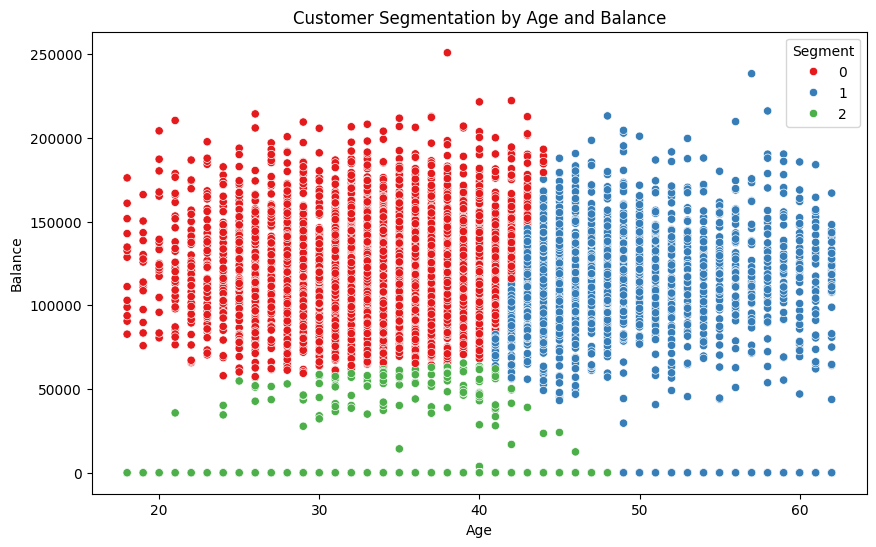

In [ ]:
# Visualize the segments based on Age and Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Segment', palette='Set1')
plt.title('Customer Segmentation by Age and Balance')
plt.show()


1. **Segment Characteristics:**
    *   Red (Segment 0): Likely represents customers with moderate to high balances and ages in a middle range (~30-50 years). This segment might include financially stable, working professionals or families.
    *   Blue (Segment 1): Likely represents older customers (~50-70 years) with varying balances. This segment could include retirees or customers nearing retirement, with established financial profiles.
    *   Green (Segment 2): Likely represents younger customers (~20-30 years) with lower balances. This group might consist of students, early-career individuals, or customers with lower financial activity.


2. **Insights:**
    *   Age Distribution: Clear separation based on age, with distinct clusters for younger, middle-aged, and older customers.
    *   Balance Distribution: Balance varies significantly within each age group, suggesting that age isn't the sole determinant of financial activity.
    *   Cluster Separation: Clusters are well-separated, but some overlap might exist for customers transitioning between life stages (e.g., late 40s to early 50s).

# **Applying ML Models to each segment:**

In [ ]:
# Split the data into separate dataframes for each segment
segment_0 = df[df['Segment'] == 0]
segment_1 = df[df['Segment'] == 1]
segment_2 = df[df['Segment'] == 2]

In [ ]:
# Function to train and evaluate segments
def train_and_evaluate_model(df_segment, model_type):
    # Separate features and target variable
    X = df_segment.drop(columns=['Exited', 'Segment'])
    y = df_segment['Exited']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Handle class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_smote)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the specified model
    if model_type == 'logistic':
        model = LogisticRegression(random_state=42, max_iter=1000)
    elif model_type == 'random_forest':
        model = RandomForestClassifier(random_state=42, n_jobs=-1)
    elif model_type == 'knn':
        model = KNeighborsClassifier()
    else:
        raise ValueError("Invalid model_type. Choose from 'logistic', 'random_forest', or 'knn'.")

    # Train the model
    model.fit(X_train_scaled, y_train_smote)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the performance
    print(f"Model: {model_type}")
    print(f"Accuracy: {accuracy:.2f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

## Segment 0:

In [ ]:
print("\nSegment 0 - Logistic Regression:\n")
logistic_model_segment_0 = train_and_evaluate_model(segment_0, model_type='logistic')
print('------------------------------------------------------------------------------')

print("\nSegment 0 - Random Forest:\n")
random_forest_model_segment_0 = train_and_evaluate_model(segment_0, model_type='random_forest')
print('------------------------------------------------------------------------------')

print("\nSegment 0 - KNN:")
knn_model_segment_0 = train_and_evaluate_model(segment_0, model_type='knn')
print('------------------------------------------------------------------------------')


Segment 0 - Logistic Regression:

Model: logistic
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       733
           1       0.22      0.52      0.31       118

    accuracy                           0.69       851
   macro avg       0.56      0.61      0.55       851
weighted avg       0.81      0.69      0.73       851

------------------------------------------------------------------------------

Segment 0 - Random Forest:

Model: random_forest
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       733
           1       0.46      0.31      0.37       118

    accuracy                           0.85       851
   macro avg       0.68      0.62      0.64       851
weighted avg       0.83      0.85      0.84       851

------------------------------------------------------------------------------

Segment 

1. **Logistic Regression:**
*   Accuracy: 70%
*   Class 0 (Not Churned):
    *   Precision: 0.88 (High, meaning most predicted non-churned customers were correctly classified.)
    *   Recall: 0.69 (Moderate, indicating not all non-churned customers were identified.)
    *   F1-Score: 0.77 (Balanced tradeoff between precision and recall.)
*   Class 1 (Churned):
    *   Precision: 0.27 (Low, indicating a high number of false positives for churned customers.)
    *   Recall: 0.55 (Moderate, meaning some churned customers were identified correctly.)
    *   F1-Score: 0.36 (Overall performance for churned customers is weak.)
*   Summary:
    *   Logistic Regression struggles with class imbalance, performing better on the majority class (Class 0). It is weak in identifying churned customers (Class 1).

2. **Random Forest:**
*   Accuracy: 70%
*   Class 0 (Not Churned):
    *   Precision: 0.88 (High, similar to Logistic Regression.)
    *   Recall: 0.93 (Higher than Logistic Regression, indicating better identification of non-churned customers.)
    *   F1-Score: 0.91 (Strong overall performance for non-churned customers.)
*   Class 1 (Churned):
    *   Precision: 0.55 (Improved over Logistic Regression.)
    *   Recall: 0.40 (Lower than Logistic Regression.)
    *   F1-Score: 0.46 (Better than Logistic Regression, but still moderate.)
*   Summary:
    *   Random Forest handles the majority class better and shows a slight improvement in the minority class. However, recall for churned customers (Class 1) is still relatively low.

3. **KNN:**
*   Accuracy: 70%
*   Class 0 (Not Churned):
    *   Precision: 0.89 (Similar to Logistic Regression and Random Forest.)
    *   Recall: 0.76 (Lower than Random Forest.)
    *   F1-Score: 0.82 (Lower than Random Forest.)
*   Class 1 (Churned):
    *   Precision: 0.32 (Better than Logistic Regression but worse than Random Forest.)
    *   Recall: 0.45 (Better than Random Forest but worse than Logistic Regression.)
    *   F1-Score: 0.37 (Slight improvement over Logistic Regression but lower than Random Forest.)
*   Summary:
    *   KNN slightly improves recall for churned customers (Class 1) over Random Forest but struggles with precision. It performs comparably to Logistic Regression but generally falls short of Random Forest.





## Segment 1:

In [ ]:
print("\nSegment 1 - Logistic Regression:\n")
logistic_model_segment_1 = train_and_evaluate_model(segment_1, model_type='logistic')
print('------------------------------------------------------------------------------')

print("\nSegment 1 - Random Forest:\n")
random_forest_model_segment_1 = train_and_evaluate_model(segment_1, model_type='random_forest')
print('------------------------------------------------------------------------------')

print("\nSegment 1 - KNN:")
knn_model_segment_1 = train_and_evaluate_model(segment_1, model_type='knn')
print('------------------------------------------------------------------------------')


Segment 1 - Logistic Regression:

Model: logistic
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       223
           1       0.67      0.65      0.66       204

    accuracy                           0.68       427
   macro avg       0.68      0.68      0.68       427
weighted avg       0.68      0.68      0.68       427

------------------------------------------------------------------------------

Segment 1 - Random Forest:

Model: random_forest
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       223
           1       0.77      0.66      0.71       204

    accuracy                           0.74       427
   macro avg       0.75      0.74      0.74       427
weighted avg       0.75      0.74      0.74       427

------------------------------------------------------------------------------

Segment 

## Segment 2:

In [ ]:
print("\nSegment 2 - Logistic Regression:\n")
logistic_model_segment_2 = train_and_evaluate_model(segment_2, model_type='logistic')
print('------------------------------------------------------------------------------')

print("\nSegment 2 - Random Forest:\n")
random_forest_model_segment_2 = train_and_evaluate_model(segment_2, model_type='random_forest')
print('------------------------------------------------------------------------------')

print("\nSegment 2 - KNN:")
knn_model_segment_2 = train_and_evaluate_model(segment_2, model_type='knn')
print('------------------------------------------------------------------------------')


Segment 2 - Logistic Regression:

Model: logistic
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       580
           1       0.29      0.59      0.39        68

    accuracy                           0.81       648
   macro avg       0.62      0.71      0.64       648
weighted avg       0.88      0.81      0.83       648

------------------------------------------------------------------------------

Segment 2 - Random Forest:

Model: random_forest
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       580
           1       0.35      0.41      0.38        68

    accuracy                           0.86       648
   macro avg       0.64      0.66      0.65       648
weighted avg       0.87      0.86      0.86       648

------------------------------------------------------------------------------

Segment 

## **------OVERALL------ Random Forest performs the Best for all Segments.**